In [1]:
# Make module from local packages importable
import os
import sys
os.chdir('/local/home/mhoerold/entrack')

In [2]:
from src.data.mnist import read as mnist_read
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Some global constants
MNIST_PATH = "data/mnist"

# Load Data

In [4]:
images, labels = mnist_read.load_mnist_training(MNIST_PATH)
images = np.reshape(images, (-1, 784))
images.shape

(60000, 784)

In [16]:
pca_components = [10, 20, 100, 200]
recon = []
pcas = []

In [17]:
for c in pca_components:
    pca = PCA(n_components=c)
    pcas.append(pca)
    images_compr = pca.fit_transform(images)
    images_re = pca.inverse_transform(images_compr)
    recon.append(images_re)

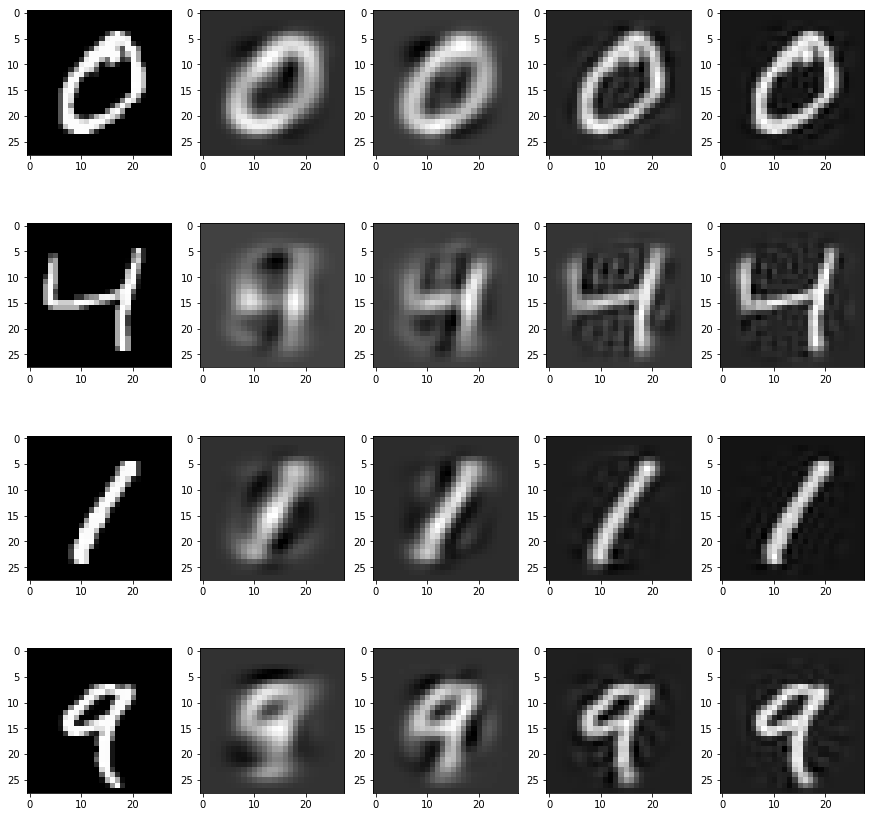

In [18]:
n = 4
rows = n
columns = len(pca_components) + 1
fig = plt.figure(figsize=(15,15))
count = 1
for i in range(1, n + 1):
    # plot original image
    fig.add_subplot(rows, columns, count)
    count += 1
    plt.imshow(np.reshape(images[i], (28, 28)), cmap='gray')
    for j in range(len(pca_components)):
        fig.add_subplot(rows, columns, count)
        count += 1
        plt.imshow(np.reshape(recon[j][i], (28, 28)), cmap='gray')

# Perform Logistic Regression on Raw Data

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
clf = LogisticRegression(C=1)
train_size = 4000

In [45]:
images_test, labels_test = mnist_read.load_mnist_test(MNIST_PATH)
images_test = np.reshape(images_test, (-1, 784))

In [46]:
clf.fit(images[:train_size], labels[:train_size])

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
preds = clf.predict(images_test)
accuracy_score(preds, labels_test)

0.8222

## Logistic Regression on Reconstucted Images from PCA

In [48]:
recon_id = 0
images_train = recon[recon_id][:train_size]
pca = pcas[recon_id]
images_t = pca.inverse_transform(pca.transform(images_test))

In [49]:
clf.fit(images_train, labels[:train_size])

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
preds = clf.predict(images_t)
accuracy_score(preds, labels_test)

0.7796

## Test-Retest example

(-0.5, 27.5, 27.5, -0.5)

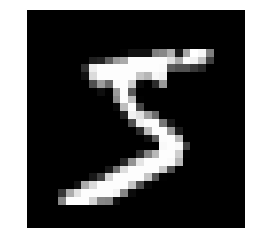

In [14]:
plt.imshow(np.reshape(images[0], (28, 28)), cmap='gray')
plt.axis('off')

In [8]:
test, retest, labels = mnist_read.load_test_retest(
    'data/mnist',
    'data/mnist_sampled_train_set/X_mnist_sampled_train_set.npy',
    1000,
    train=True
)

(-0.5, 27.5, 27.5, -0.5)

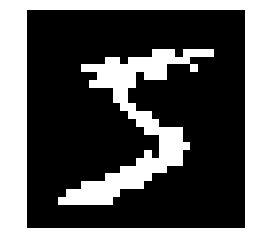

In [16]:
plt.imshow(np.reshape(retest[0], (28, 28)), cmap='gray')
plt.axis('off')